<a href="https://colab.research.google.com/github/Lasal0425/ML_Coursework_Breast_Cancer_Detection/blob/main/CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              4024 non-null   object 
 1   Month_of_Birth          4024 non-null   int64  
 2   Age                     4015 non-null   float64
 3   Sex                     4020 non-null   object 
 4   Occupation              43 non-null     object 
 5   T_Stage                 4024 non-null   object 
 6   N_Stage                 4024 non-null   object 
 7   6th_Stage               4024 non-null   object 
 8   Differentiated          4024 non-null   object 
 9   Grade                   4024 non-null   int64  
 10  A_Stage                 4024 non-null   object 
 11  Tumor_Size              4021 non-null   float64
 12  Estrogen_Status         4024 non-null   object 
 13  Progesterone_Status     4024 non-null   object 
 14  Regional_Node_Examined  4023 non-null   

<ipython-input-2-5873fcb8d8fe>:38: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age'] = df['Age'].fillna(df['Age'].median())
<ipython-input-2-5873fcb8d8fe>:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Tumor_Size'] = df['Tumor_Size'].fillna(df['Tumor_Size'].median())


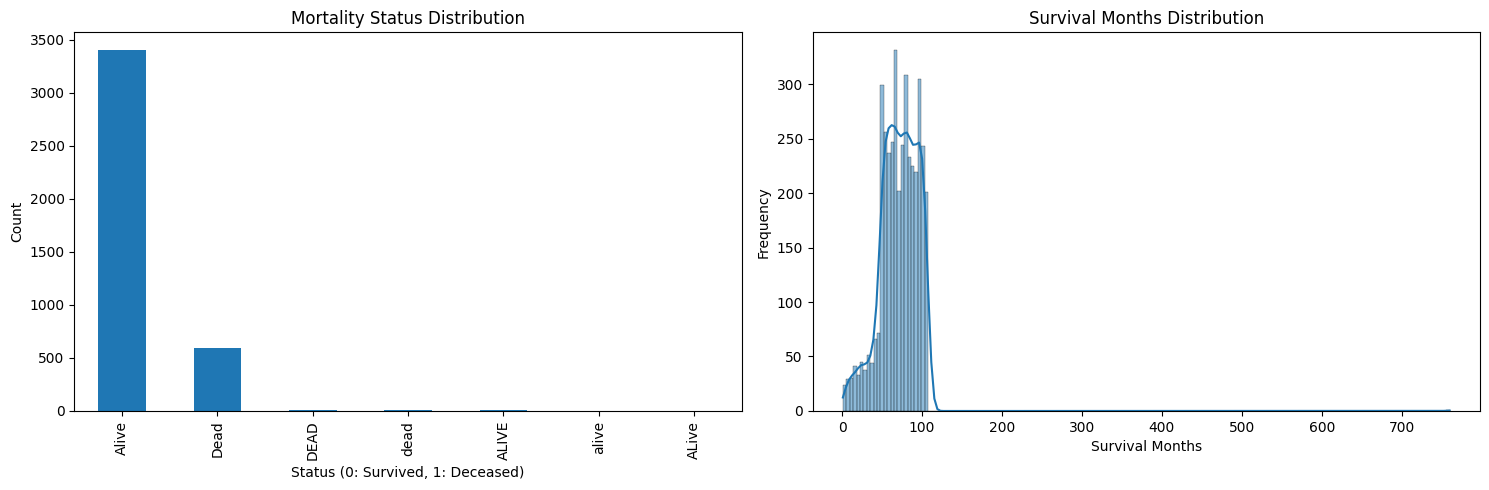

Converting Mortality_Status to numeric...


<Figure size 1000x800 with 0 Axes>

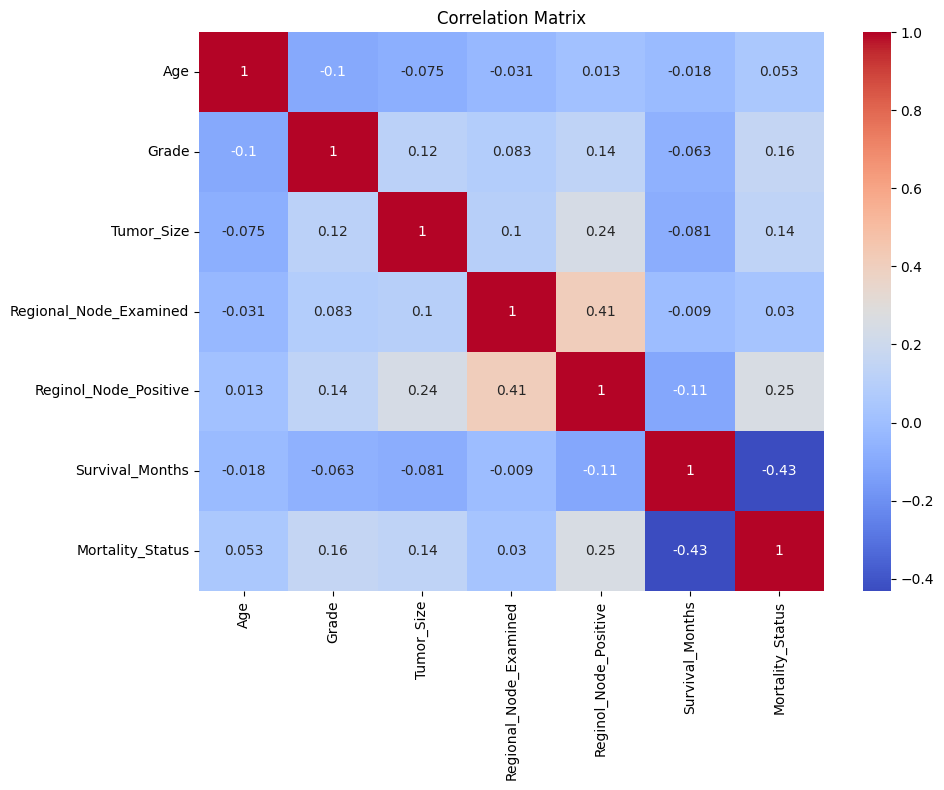

   Month_of_Birth   Age     Sex T_Stage N_Stage 6th_Stage  \
0              12  68.0  Female      T1      N1       IIA   
1              12  50.0  Female      T2      N2      IIIA   
2              11  58.0  Female      T3      N3      IIIC   
3               3  58.0  Female      T1      N1       IIA   
4               1  47.0  Female      T2      N1       IIB   

              Differentiated  Grade   A_Stage  Tumor_Size Estrogen_Status  \
0      Poorly differentiated      3  Regional         4.0        Positive   
1  Moderately differentiated      2  Regional        35.0        Positive   
2  Moderately differentiated      2  Regional        63.0        Positive   
3      Poorly differentiated      3  Regional        18.0        Positive   
4      Poorly differentiated      3  Regional        41.0        Positive   

  Progesterone_Status  Regional_Node_Examined  Reginol_Node_Positive  \
0            Positive                    24.0                      1   
1            Positive     

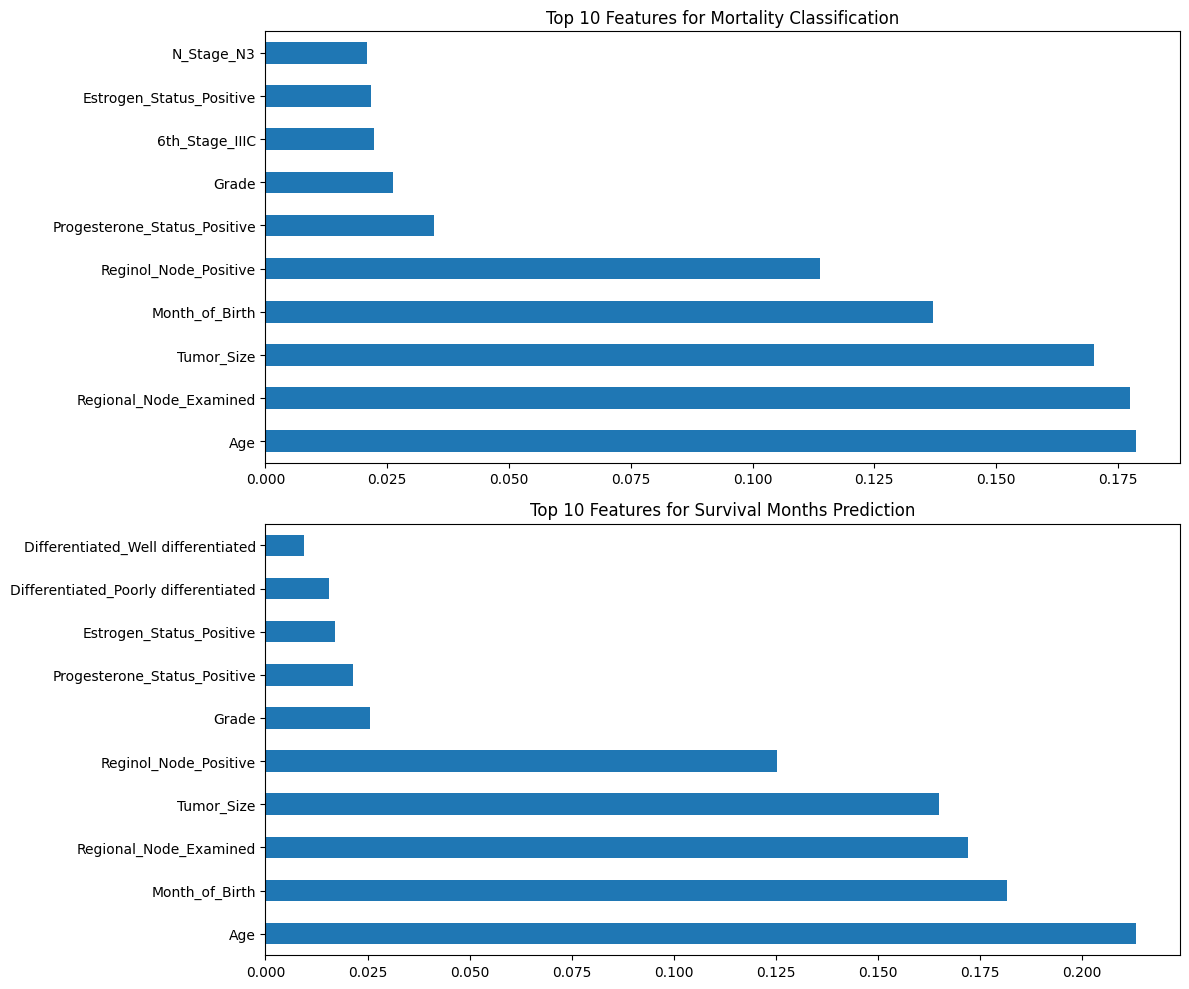

Data preparation and exploration complete!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Coursework/5DATA002W.2 Coursework Dataset(25012025v6.0).csv"
df = pd.read_csv(file_path)

# Display dataset info
df.info()
df.head()

# Check for missing values
df.isnull().sum()

# Drop Occupation column
df.drop('Occupation', axis=1, inplace=True)

# Fill missing values without using inplace=True
df['Age'] = df['Age'].fillna(df['Age'].median())  # Fill 'Age' with the median
df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])  # Fill 'Sex' with the most frequent value (mode)
df['Tumor_Size'] = df['Tumor_Size'].fillna(df['Tumor_Size'].median())  # Fill 'Tumor_Size' with the median
df['Regional_Node_Examined'] = df['Regional_Node_Examined'].fillna(df['Regional_Node_Examined'].median())  # Fill 'Regional_Node_Examined' with the median

print("Missing values handled successfully!")

# Verify missing values are handled
df.isnull().sum()

# Check the statistics of numerical columns
df[['Age', 'Tumor_Size', 'Regional_Node_Examined']].describe()

# Fix invalid Age values (negative and extremely high values)
df['Age'] = df['Age'].apply(lambda x: x if 0 <= x <= 120 else pd.NA)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fix invalid Tumor_Size values (negative values)
df['Tumor_Size'] = df['Tumor_Size'].apply(lambda x: x if x >= 0 else pd.NA)
df['Tumor_Size'] = df['Tumor_Size'].fillna(df['Tumor_Size'].median())

# Define an upper threshold for Regional_Node_Examined (e.g., 95th percentile)
upper_threshold = df['Regional_Node_Examined'].quantile(0.95)
df['Regional_Node_Examined'] = df['Regional_Node_Examined'].fillna(df['Regional_Node_Examined'].median())

# Ensure numeric columns are properly cast
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Tumor_Size'] = pd.to_numeric(df['Tumor_Size'], errors='coerce')
df['Regional_Node_Examined'] = pd.to_numeric(df['Regional_Node_Examined'], errors='coerce')

# Check statistics after cleaning
df[['Age', 'Tumor_Size', 'Regional_Node_Examined']].describe()

# ENHANCEMENT: Data Visualization for EDA
# Visualize target distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
df['Mortality_Status'].value_counts().plot(kind='bar')
plt.title('Mortality Status Distribution')
plt.ylabel('Count')
plt.xlabel('Status (0: Survived, 1: Deceased)')

plt.subplot(1, 2, 2)
sns.histplot(df['Survival_Months'], kde=True)
plt.title('Survival Months Distribution')
plt.ylabel('Frequency')
plt.xlabel('Survival Months')

plt.tight_layout()
plt.show()

# ENHANCEMENT: Correlation analysis for numerical features
plt.figure(figsize=(10, 8))
# ENHANCEMENT: Correlation analysis for numerical features
plt.figure(figsize=(10, 8))

# Make sure Mortality_Status is numeric (it seems to contain 'Alive' values)
if df['Mortality_Status'].dtype == 'object':
    print("Converting Mortality_Status to numeric...")
    # Replace 'Alive' with 0 and other values with 1
    df['Mortality_Status'] = df['Mortality_Status'].map(lambda x: 0 if x == 'Alive' else 1)

numeric_cols = ['Age', 'Grade', 'Tumor_Size', 'Regional_Node_Examined',
                'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
# ENHANCEMENT: Handle categorical variables
# Identify categorical columns
categorical_cols = ['Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
                   'A_Stage', 'Estrogen_Status', 'Progesterone_Status']

# Create a copy of the dataframe to avoid modifying the original
df_processed = df.copy()

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(
    encoded_cats,
    columns=encoder.get_feature_names_out(categorical_cols)
)

# Identify numerical columns for scaling
numerical_cols = ['Month_of_Birth', 'Age', 'Grade', 'Tumor_Size',
                 'Regional_Node_Examined', 'Reginol_Node_Positive']

# Scale numerical features
scaler = StandardScaler()
scaled_numerics = scaler.fit_transform(df[numerical_cols])
scaled_df = pd.DataFrame(
    scaled_numerics,
    columns=numerical_cols
)

# Combine scaled numerical and encoded categorical features
df_processed = pd.concat([
    scaled_df.reset_index(drop=True),
    encoded_df.reset_index(drop=True)
], axis=1)

# Select features for classification (as you did before)
classification_features = [col for col in df.columns if col not in ['Patient_ID', 'Mortality_Status']]
classification_target = 'Mortality_Status'

# Create the classification DataFrame
df_classification = df[classification_features + [classification_target]].copy()
print(df_classification.head())

# Select features for regression (as you did before)
regression_features = [col for col in df.columns if col not in ['Patient_ID', 'Survival_Months']]
regression_target = 'Survival_Months'

# Create the regression DataFrame
df_regression = df[regression_features + [regression_target]].copy()
print(df_regression.head())

# ENHANCEMENT: Create train-test splits
# For classification
X_class = df_processed.copy()
y_class = df['Mortality_Status']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# For regression
X_reg = df_processed.copy()
y_reg = df['Survival_Months']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Save the original dataframes as you did before
df_classification.to_csv('cancer_classification_dataset.csv', index=False)
df_regression.to_csv('cancer_regression_dataset.csv', index=False)

# ENHANCEMENT: Save the processed and split datasets
# Save all processed datasets
X_train_class.to_csv('X_train_classification.csv', index=False)
y_train_class.to_csv('y_train_classification.csv', index=False)
X_test_class.to_csv('X_test_classification.csv', index=False)
y_test_class.to_csv('y_test_classification.csv', index=False)

X_train_reg.to_csv('X_train_regression.csv', index=False)
y_train_reg.to_csv('y_train_regression.csv', index=False)
X_test_reg.to_csv('X_test_regression.csv', index=False)
y_test_reg.to_csv('y_test_regression.csv', index=False)

print("All datasets successfully created and saved!")

# ENHANCEMENT: Feature importance analysis using a simple model
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# For classification
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(X_train_class, y_train_class)

# For regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

# Plot feature importances
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
feature_importances = pd.Series(rf_class.feature_importances_, index=X_train_class.columns)
feature_importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Features for Mortality Classification')

plt.subplot(2, 1, 2)
feature_importances = pd.Series(rf_reg.feature_importances_, index=X_train_reg.columns)
feature_importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Features for Survival Months Prediction')

plt.tight_layout()
plt.show()

print("Data preparation and exploration complete!")

Dataset loaded successfully with shape: (4024, 16)
   Month_of_Birth   Age     Sex T_Stage N_Stage 6th_Stage  \
0              12  68.0  Female      T1      N1       IIA   
1              12  50.0  Female      T2      N2      IIIA   
2              11  58.0  Female      T3      N3      IIIC   
3               3  58.0  Female      T1      N1       IIA   
4               1  47.0  Female      T2      N1       IIB   

              Differentiated  Grade   A_Stage  Tumor_Size Estrogen_Status  \
0      Poorly differentiated      3  Regional         4.0        Positive   
1  Moderately differentiated      2  Regional        35.0        Positive   
2  Moderately differentiated      2  Regional        63.0        Positive   
3      Poorly differentiated      3  Regional        18.0        Positive   
4      Poorly differentiated      3  Regional        41.0        Positive   

  Progesterone_Status  Regional_Node_Examined  Reginol_Node_Positive  \
0            Positive                    24.0  

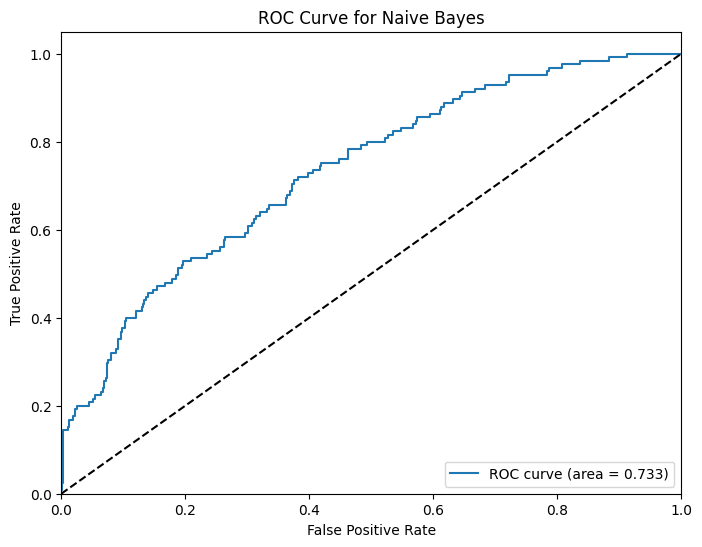


========== Logistic Regression ==========
Performing grid search for Logistic Regression...
Best parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best cross-validation score: 0.8947

--- Logistic Regression Results ---
Accuracy: 0.8894
AUC: 0.8295

Confusion Matrix:
[[664  16]
 [ 73  52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       680
           1       0.76      0.42      0.54       125

    accuracy                           0.89       805
   macro avg       0.83      0.70      0.74       805
weighted avg       0.88      0.89      0.88       805



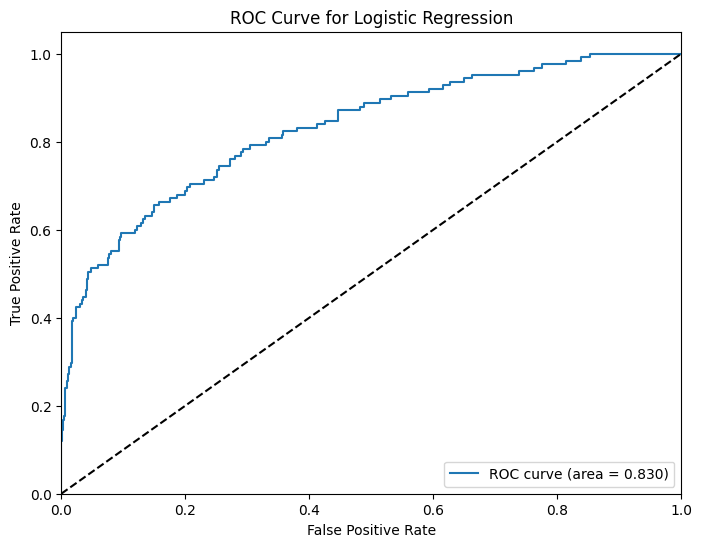


========== K-Nearest Neighbors ==========
Performing grid search for KNN...
Best parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 9, 'classifier__p': 1, 'classifier__weights': 'distance'}
Best cross-validation score: 0.8792

--- K-Nearest Neighbors Results ---
Accuracy: 0.8696
AUC: 0.7698

Confusion Matrix:
[[669  11]
 [ 94  31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       680
           1       0.74      0.25      0.37       125

    accuracy                           0.87       805
   macro avg       0.81      0.62      0.65       805
weighted avg       0.86      0.87      0.84       805



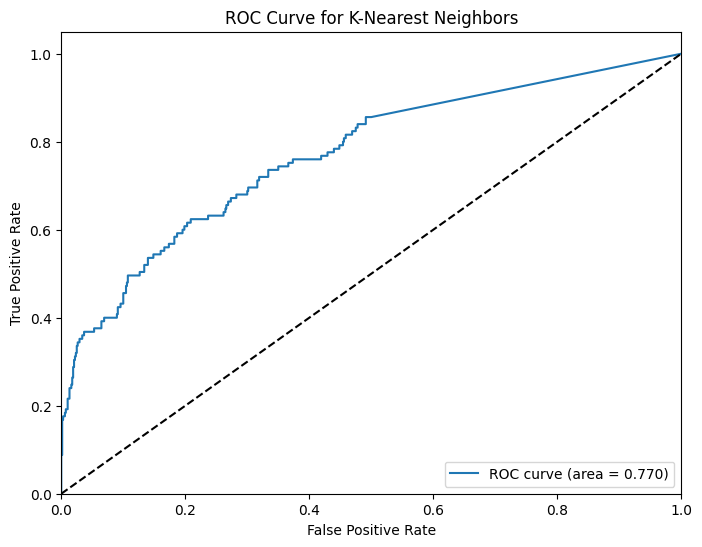


========== Model Comparison ==========


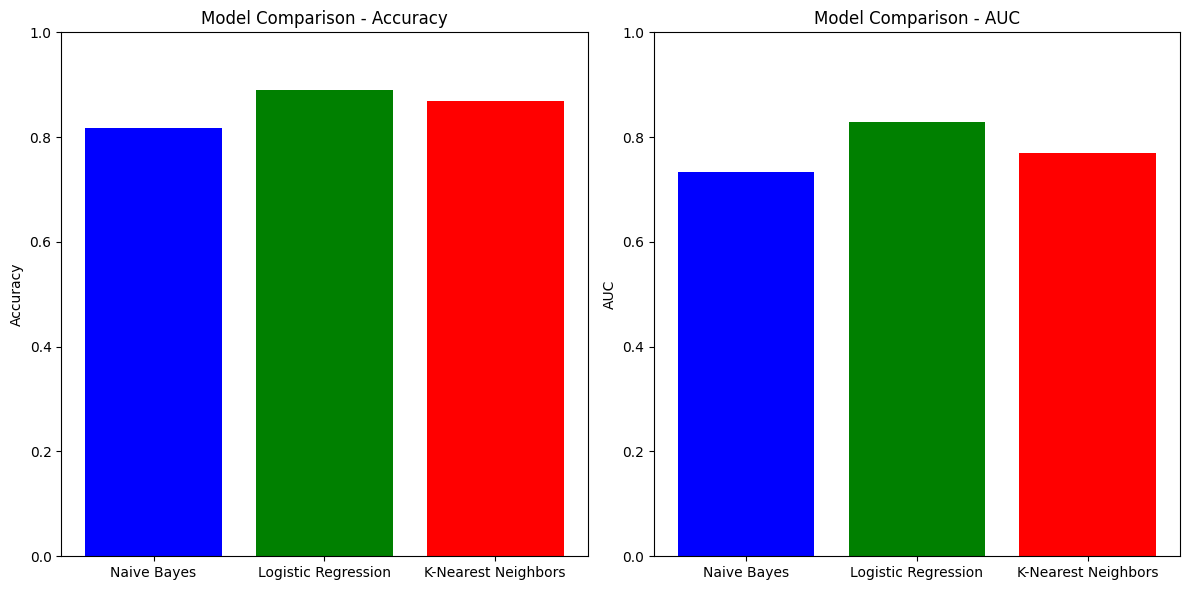

                 Model  Accuracy       AUC
1  Logistic Regression  0.889441  0.829506
2  K-Nearest Neighbors  0.869565  0.769788
0          Naive Bayes  0.817391  0.733118

Saving the best model: Logistic Regression
Best model saved successfully!


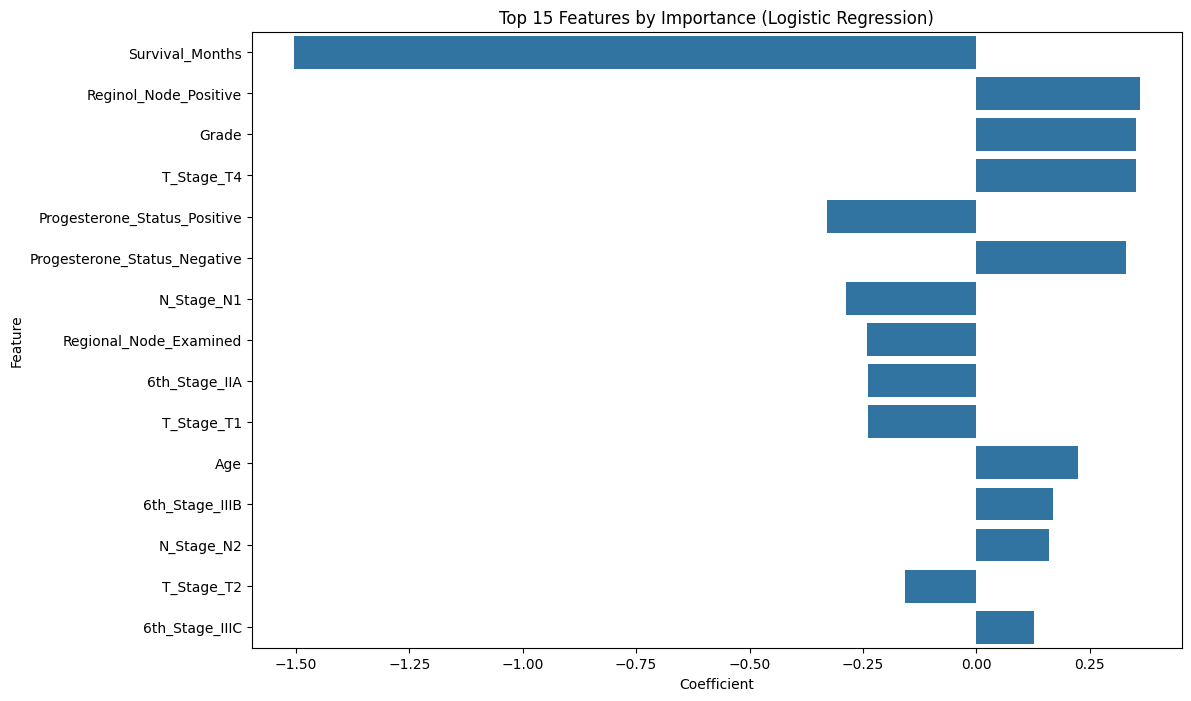


Top 15 features by importance:
                         Feature  Coefficient
6                Survival_Months    -1.503656
5          Reginol_Node_Positive     0.359564
2                          Grade     0.351969
12                    T_Stage_T4     0.351454
30  Progesterone_Status_Positive    -0.329167
29  Progesterone_Status_Negative     0.328938
13                    N_Stage_N1    -0.286625
4         Regional_Node_Examined    -0.241403
16                 6th_Stage_IIA    -0.238852
9                     T_Stage_T1    -0.238317
1                            Age     0.223675
19                6th_Stage_IIIB     0.168519
14                    N_Stage_N2     0.159001
10                    T_Stage_T2    -0.156513
20                6th_Stage_IIIC     0.127395


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Set random seed for reproducibility
np.random.seed(42)

# Load the classification dataset
df = pd.read_csv('cancer_classification_dataset.csv')
print("Dataset loaded successfully with shape:", df.shape)
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Split the data into features and target
X = df.drop('Mortality_Status', axis=1)
y = df['Mortality_Status']

# Check if target is categorical and convert if needed
if y.dtype == 'object':
    print("\nConverting categorical target to numeric...")
    y = y.map(lambda x: 0 if x == 'Alive' else 1)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nData split into training and testing sets")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_cols)
    ])

# Define a function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else np.array([0.5 for _ in range(len(y_test))])

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # Print results
    print(f"\n--- {model_name} Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(report)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    return model, accuracy, auc, conf_matrix, report

# 1. Naive Bayes Classifier
print("\n========== Naive Bayes Classifier ==========")

# Create a pipeline with preprocessing and Naive Bayes
naive_bayes_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Define parameters for Naive Bayes
# For Gaussian Naive Bayes, we can try different var_smoothing values
nb_param_grid = {
    'classifier__var_smoothing': np.logspace(-10, -1, 10)
}

# Create grid search
naive_bayes_grid = GridSearchCV(
    naive_bayes_pipeline,
    nb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the grid search
print("Performing grid search for Naive Bayes...")
naive_bayes_grid.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {naive_bayes_grid.best_params_}")
print(f"Best cross-validation score: {naive_bayes_grid.best_score_:.4f}")

# Evaluate the best model
best_nb = naive_bayes_grid.best_estimator_
nb_model, nb_acc, nb_auc, nb_cm, nb_report = evaluate_model(best_nb, X_train, X_test, y_train, y_test, "Naive Bayes")

# 2. Logistic Regression
print("\n========== Logistic Regression ==========")

# Create a pipeline with preprocessing and Logistic Regression
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Define parameters for Logistic Regression
logreg_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2', 'l1', 'elasticnet', None],
    'classifier__solver': ['lbfgs', 'newton-cg', 'liblinear']
}

# Create grid search
logreg_grid = GridSearchCV(
    logreg_pipeline,
    logreg_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    error_score='raise'
)

# Update the param grid to handle solver incompatibilities
logreg_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2', None],
    'classifier__solver': ['lbfgs', 'newton-cg']
}

logreg_param_grid_liblinear = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

# Use a more compatible parameter grid
logreg_grid = GridSearchCV(
    logreg_pipeline,
    logreg_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the grid search
print("Performing grid search for Logistic Regression...")
logreg_grid.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {logreg_grid.best_params_}")
print(f"Best cross-validation score: {logreg_grid.best_score_:.4f}")

# Evaluate the best model
best_logreg = logreg_grid.best_estimator_
logreg_model, logreg_acc, logreg_auc, logreg_cm, logreg_report = evaluate_model(best_logreg, X_train, X_test, y_train, y_test, "Logistic Regression")

# 3. K-Nearest Neighbors
print("\n========== K-Nearest Neighbors ==========")

# Create a pipeline with preprocessing and KNN
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Define parameters for KNN
knn_param_grid = {
    'classifier__n_neighbors': list(range(1, 31, 2)),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],
    'classifier__p': [1, 2]  # only relevant for Minkowski metric
}

# Create grid search
knn_grid = GridSearchCV(
    knn_pipeline,
    knn_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the grid search
print("Performing grid search for KNN...")
knn_grid.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {knn_grid.best_params_}")
print(f"Best cross-validation score: {knn_grid.best_score_:.4f}")

# Evaluate the best model
best_knn = knn_grid.best_estimator_
knn_model, knn_acc, knn_auc, knn_cm, knn_report = evaluate_model(best_knn, X_train, X_test, y_train, y_test, "K-Nearest Neighbors")

# Compare the models
print("\n========== Model Comparison ==========")
models = ['Naive Bayes', 'Logistic Regression', 'K-Nearest Neighbors']
accuracies = [nb_acc, logreg_acc, knn_acc]
aucs = [nb_auc, logreg_auc, knn_auc]

# Create a bar plot to compare models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

plt.subplot(1, 2, 2)
plt.bar(models, aucs, color=['blue', 'green', 'red'])
plt.title('Model Comparison - AUC')
plt.ylabel('AUC')
plt.ylim([0, 1])

plt.tight_layout()
plt.show()

# Detailed comparison table
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'AUC': aucs
})
print(comparison_df.sort_values('Accuracy', ascending=False))

# Save the best model
import joblib

# Save the best model (choose the one with the highest accuracy)
best_model_idx = accuracies.index(max(accuracies))
best_model_name = models[best_model_idx]
best_model = [nb_model, logreg_model, knn_model][best_model_idx]

print(f"\nSaving the best model: {best_model_name}")
joblib.dump(best_model, f'best_cancer_mortality_classifier.pkl')
print("Best model saved successfully!")

# Generate visualizations for feature importance (for Logistic Regression)
if hasattr(best_logreg.named_steps['classifier'], 'coef_'):
    # Get feature names after preprocessing
    cat_features = best_logreg.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)
    all_features = numerical_cols + list(cat_features)

    # Get the coefficients
    coefficients = best_logreg.named_steps['classifier'].coef_[0]

    # Only include the first len(all_features) coefficients in case there are more
    if len(coefficients) > len(all_features):
        coefficients = coefficients[:len(all_features)]

    # Create a DataFrame for visualization
    coef_df = pd.DataFrame({'Feature': all_features[:len(coefficients)], 'Coefficient': coefficients})
    coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

    # Plot the top 15 features
    plt.figure(figsize=(12, 8))
    top_features = coef_df.head(15)
    sns.barplot(x='Coefficient', y='Feature', data=top_features)
    plt.title('Top 15 Features by Importance (Logistic Regression)')
    plt.show()

    print("\nTop 15 features by importance:")
    print(top_features)

Dataset loaded successfully with shape: (4024, 16)
   Month_of_Birth   Age     Sex T_Stage N_Stage 6th_Stage  \
0              12  68.0  Female      T1      N1       IIA   
1              12  50.0  Female      T2      N2      IIIA   
2              11  58.0  Female      T3      N3      IIIC   
3               3  58.0  Female      T1      N1       IIA   
4               1  47.0  Female      T2      N1       IIB   

              Differentiated  Grade   A_Stage  Tumor_Size Estrogen_Status  \
0      Poorly differentiated      3  Regional         4.0        Positive   
1  Moderately differentiated      2  Regional        35.0        Positive   
2  Moderately differentiated      2  Regional        63.0        Positive   
3      Poorly differentiated      3  Regional        18.0        Positive   
4      Poorly differentiated      3  Regional        41.0        Positive   

  Progesterone_Status  Regional_Node_Examined  Reginol_Node_Positive  \
0            Positive                    24.0  

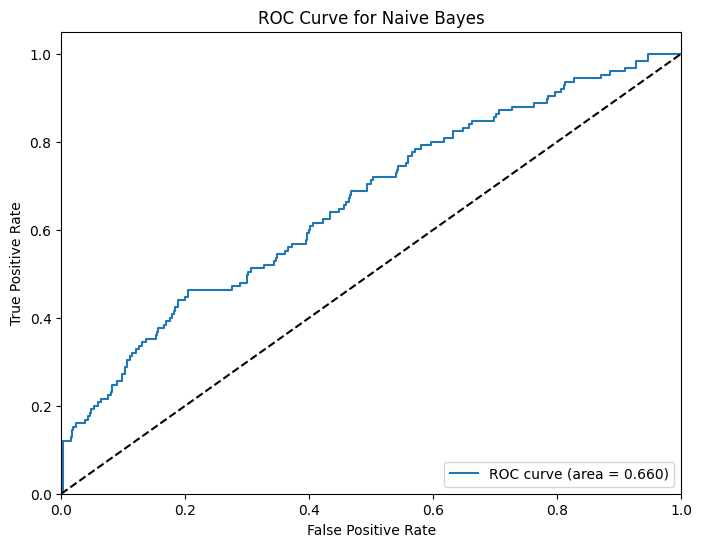


========== Logistic Regression ==========
Performing grid search for Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Best parameters: {'classifier__C': 0.001, 'classifier__penalty': None, 'classifier__solver': 'newton-cg'}
Best cross-validation score: 0.8537

--- Logistic Regression Results ---
Accuracy: 0.8484
AUC: 0.6858

Confusion Matrix:
[[668  12]
 [110  15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       680
           1       0.56      0.12      0.20       125

    accuracy                           0.85       805
   macro avg       0.71      0.55      0.56       805
weighted avg       0.81      0.85      0.80       805



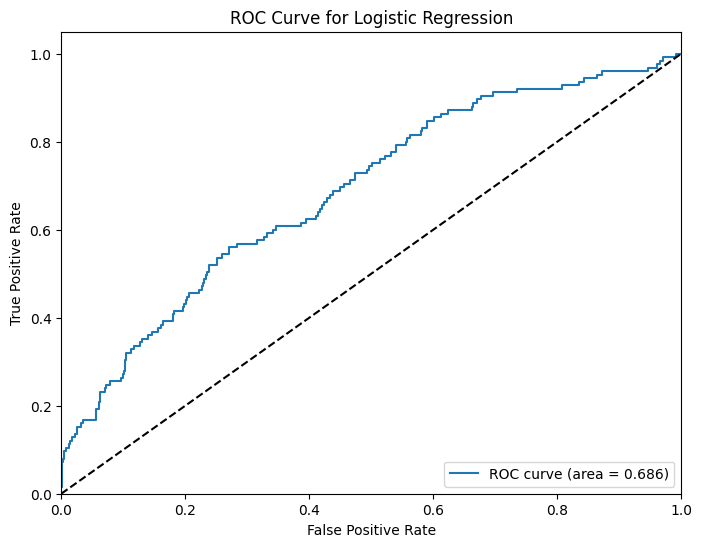


========== K-Nearest Neighbors ==========
Performing grid search for KNN...
Best parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 25, 'classifier__weights': 'distance'}
Best cross-validation score: 0.8531

--- K-Nearest Neighbors Results ---
Accuracy: 0.8447
AUC: 0.6592

Confusion Matrix:
[[665  15]
 [110  15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       680
           1       0.50      0.12      0.19       125

    accuracy                           0.84       805
   macro avg       0.68      0.55      0.55       805
weighted avg       0.80      0.84      0.80       805



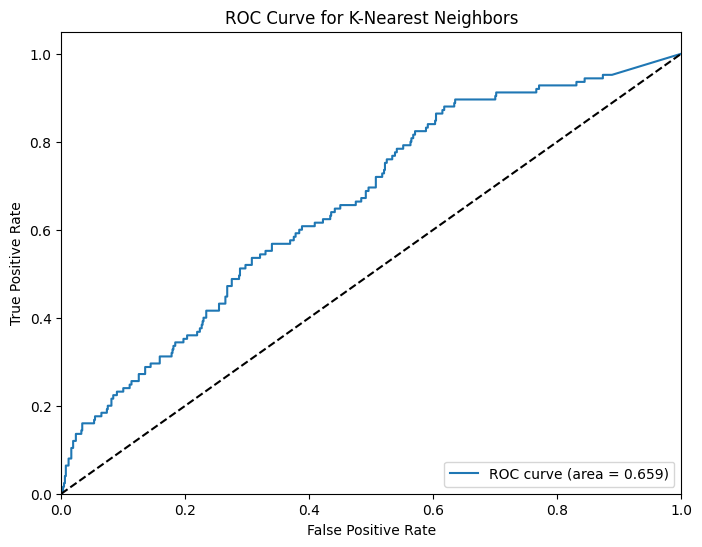


========== Voting Ensemble Classifier ==========
Creating voting ensemble with top 2 models: logreg and knn


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(



--- Voting Ensemble Results ---
Accuracy: 0.8497
AUC: 0.6826

Confusion Matrix:
[[668  12]
 [109  16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       680
           1       0.57      0.13      0.21       125

    accuracy                           0.85       805
   macro avg       0.72      0.56      0.56       805
weighted avg       0.81      0.85      0.81       805



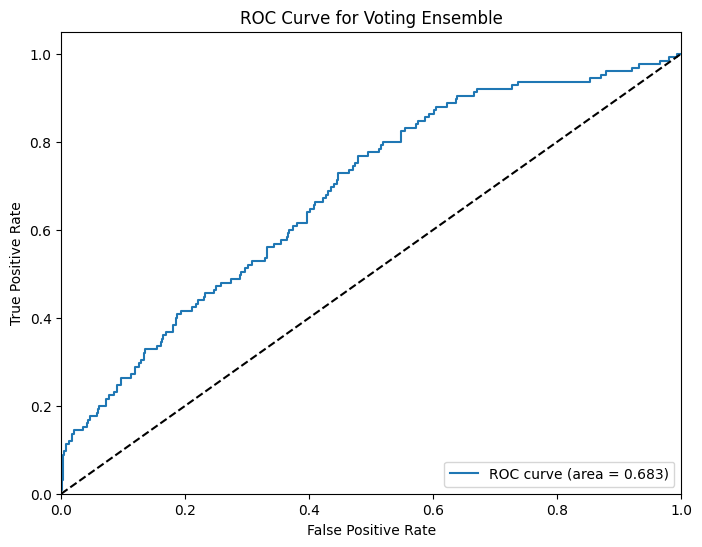


========== Classification Model Comparison ==========


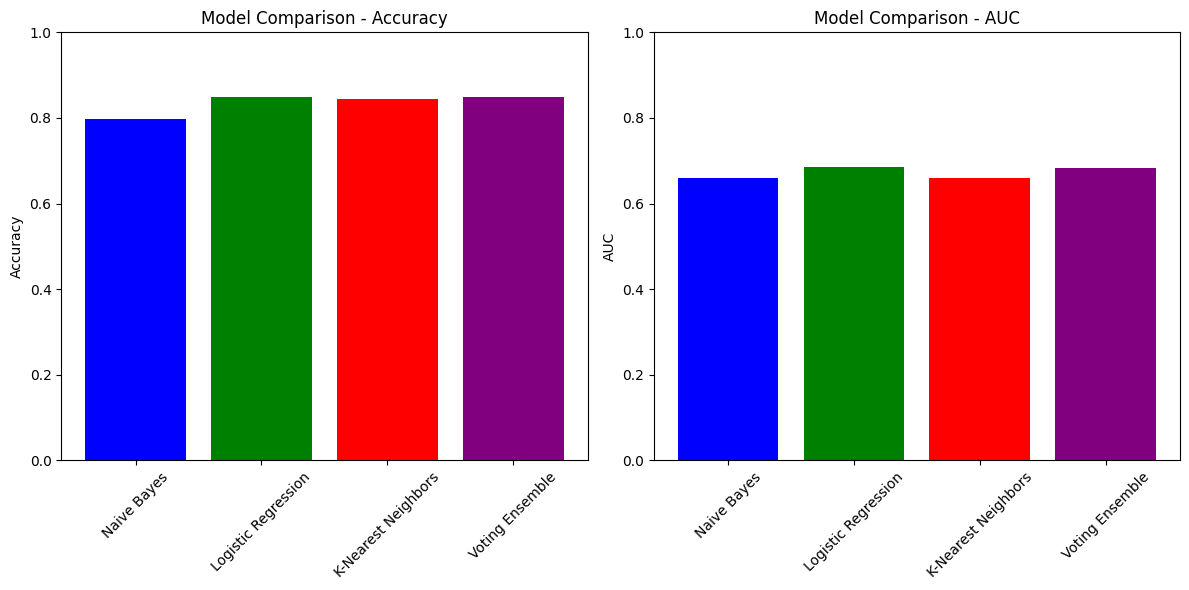

                 Model  Accuracy       AUC
3      Voting Ensemble  0.849689  0.682553
1  Logistic Regression  0.848447  0.685788
2  K-Nearest Neighbors  0.844720  0.659200
0          Naive Bayes  0.797516  0.659941

Saving the best classification model: Voting Ensemble
Best classification model saved successfully!

========== PART 2: REGRESSION MODELS FOR SURVIVAL MONTHS ==========

========== Fully-Grown Decision Tree Regressor ==========

--- Fully-Grown Decision Tree Results ---
Mean Squared Error: 1635.7627
Root Mean Squared Error: 40.4446
R² Score: -2.0606


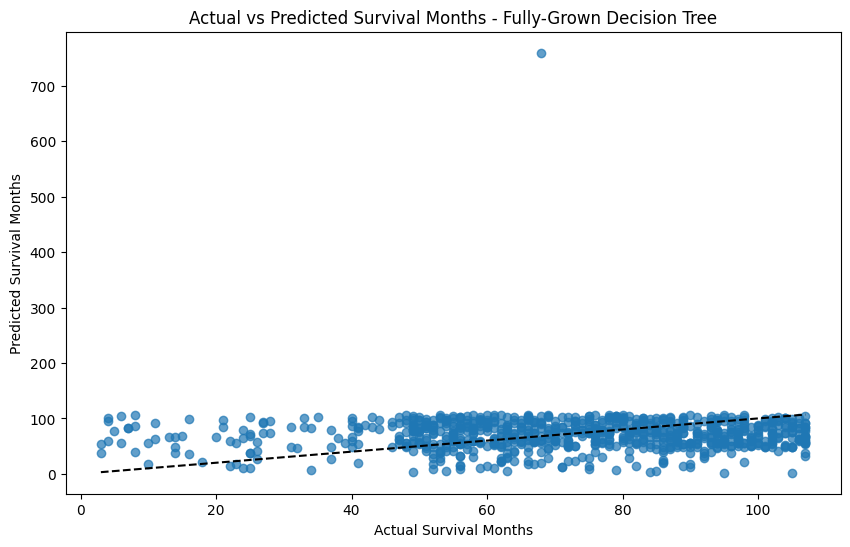

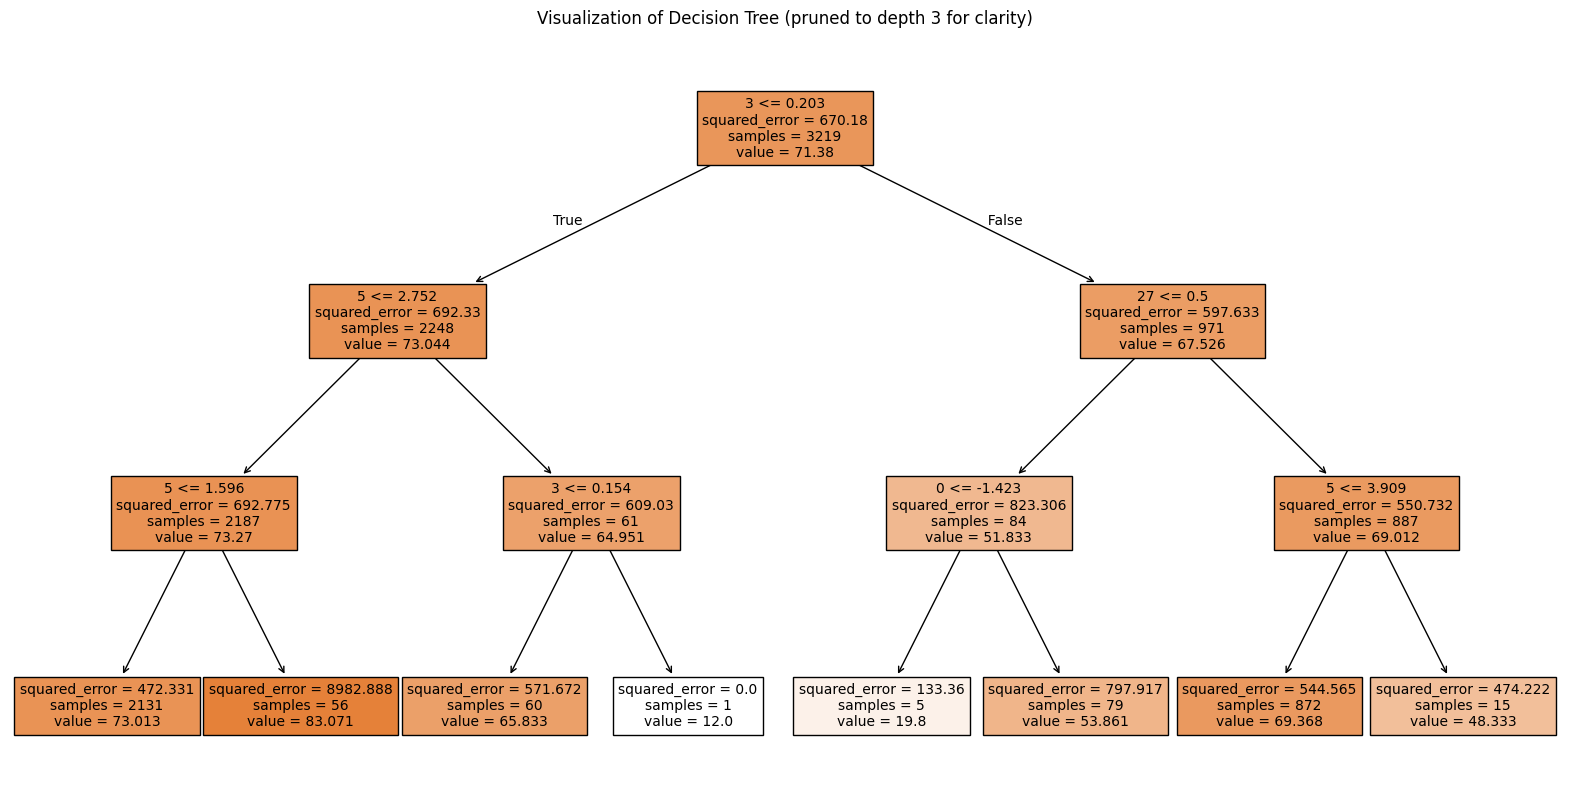


========== Pruned Decision Tree Regressor ==========
Performing grid search for pruned Decision Tree...
Best parameters: {'regressor__ccp_alpha': 0.0, 'regressor__max_depth': 3, 'regressor__min_samples_leaf': 10, 'regressor__min_samples_split': 2}
Best cross-validation score (neg_mean_squared_error): -679.8268

--- Pruned Decision Tree Results ---
Mean Squared Error: 524.3682
Root Mean Squared Error: 22.8991
R² Score: 0.0189


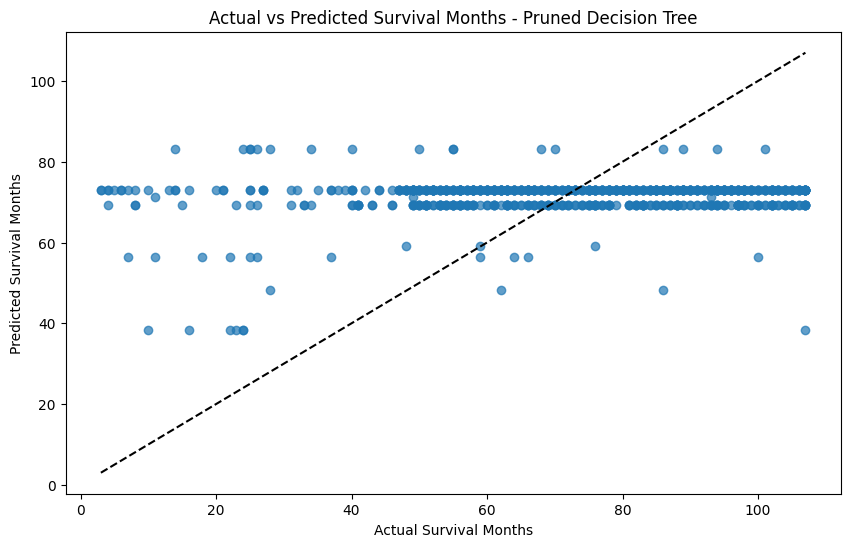


========== Regression Model Comparison ==========


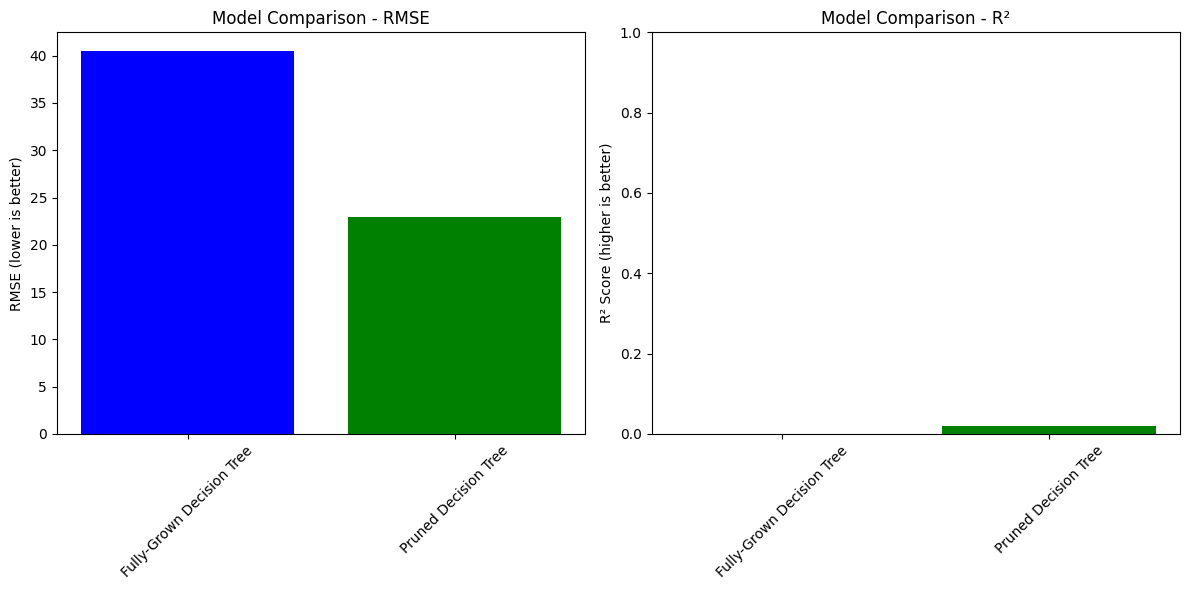

                       Model       RMSE        R²
1       Pruned Decision Tree  22.899087  0.018890
0  Fully-Grown Decision Tree  40.444564 -2.060566

Saving the best regression model: Pruned Decision Tree
Best regression model saved successfully!


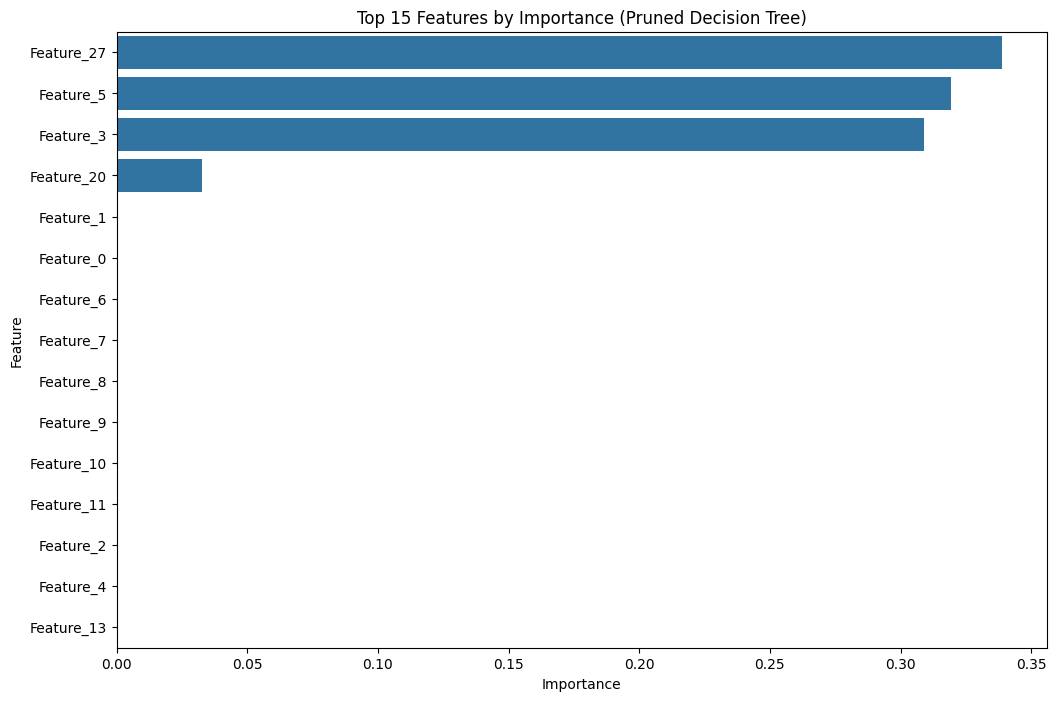


Top 15 features by importance for survival prediction:
       Feature  Importance
27  Feature_27    0.338954
5    Feature_5    0.319237
3    Feature_3    0.309066
20  Feature_20    0.032743
1    Feature_1    0.000000
0    Feature_0    0.000000
6    Feature_6    0.000000
7    Feature_7    0.000000
8    Feature_8    0.000000
9    Feature_9    0.000000
10  Feature_10    0.000000
11  Feature_11    0.000000
2    Feature_2    0.000000
4    Feature_4    0.000000
13  Feature_13    0.000000

========== Analysis Summary ==========
Best Classification Model: Voting Ensemble with accuracy 0.8497
Best Regression Model: Pruned Decision Tree with RMSE 22.8991


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree
import joblib

# Set random seed for reproducibility
np.random.seed(42)

# Load the classification dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coursework/cancer_classification_dataset.csv')
print("Dataset loaded successfully with shape:", df.shape)
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Split the data into features and target for classification
X_class = df.drop(['Mortality_Status', 'Survival_Months'], axis=1)
y_class = df['Mortality_Status']

# For regression task - predicting survival months
X_reg = df.drop('Survival_Months', axis=1)
y_reg = df['Survival_Months']

# Check if target is categorical and convert if needed
if y_class.dtype == 'object':
    print("\nConverting categorical target to numeric...")
    y_class = y_class.map(lambda x: 0 if x == 'Alive' else 1)

# Identify categorical and numerical columns
categorical_cols = X_class.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_class.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'Mortality_Status' in numerical_cols:
    numerical_cols.remove('Mortality_Status')

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)
print("\nData split into training and testing sets for classification")
print(f"Training set: {X_train_class.shape[0]} samples")
print(f"Testing set: {X_test_class.shape[0]} samples")

# Split the data into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)
print("\nData split into training and testing sets for regression")
print(f"Training set: {X_train_reg.shape[0]} samples")
print(f"Testing set: {X_test_reg.shape[0]} samples")

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_cols)
    ])

# Define a function to evaluate a classification model
def evaluate_classification_model(model, X_train, X_test, y_train, y_test, model_name):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else np.array([0.5 for _ in range(len(y_test))])

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # Print results
    print(f"\n--- {model_name} Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(report)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    return model, accuracy, auc, conf_matrix, report

# Define a function to evaluate a regression model
def evaluate_regression_model(model, X_train, X_test, y_train, y_test, model_name):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"\n--- {model_name} Results ---")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('Actual Survival Months')
    plt.ylabel('Predicted Survival Months')
    plt.title(f'Actual vs Predicted Survival Months - {model_name}')
    plt.show()

    return model, mse, rmse, r2

print("\n========== PART 1: CLASSIFICATION MODELS ==========")

# 1. Naive Bayes Classifier
print("\n========== Naive Bayes Classifier ==========")

# Create a pipeline with preprocessing and Naive Bayes
naive_bayes_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Define parameters for Naive Bayes
nb_param_grid = {
    'classifier__var_smoothing': np.logspace(-10, -1, 10)
}

# Create grid search
naive_bayes_grid = GridSearchCV(
    naive_bayes_pipeline,
    nb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the grid search
print("Performing grid search for Naive Bayes...")
naive_bayes_grid.fit(X_train_class, y_train_class)

# Best parameters and score
print(f"Best parameters: {naive_bayes_grid.best_params_}")
print(f"Best cross-validation score: {naive_bayes_grid.best_score_:.4f}")

# Evaluate the best model
best_nb = naive_bayes_grid.best_estimator_
nb_model, nb_acc, nb_auc, nb_cm, nb_report = evaluate_classification_model(
    best_nb, X_train_class, X_test_class, y_train_class, y_test_class, "Naive Bayes"
)

# 2. Logistic Regression
print("\n========== Logistic Regression ==========")

# Create a pipeline with preprocessing and Logistic Regression
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Update the param grid to handle solver incompatibilities
logreg_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2', None],
    'classifier__solver': ['lbfgs', 'newton-cg']
}

# Create grid search
logreg_grid = GridSearchCV(
    logreg_pipeline,
    logreg_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the grid search
print("Performing grid search for Logistic Regression...")
logreg_grid.fit(X_train_class, y_train_class)

# Best parameters and score
print(f"Best parameters: {logreg_grid.best_params_}")
print(f"Best cross-validation score: {logreg_grid.best_score_:.4f}")

# Evaluate the best model
best_logreg = logreg_grid.best_estimator_
logreg_model, logreg_acc, logreg_auc, logreg_cm, logreg_report = evaluate_classification_model(
    best_logreg, X_train_class, X_test_class, y_train_class, y_test_class, "Logistic Regression"
)

# 3. K-Nearest Neighbors
print("\n========== K-Nearest Neighbors ==========")

# Create a pipeline with preprocessing and KNN
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Define parameters for KNN
knn_param_grid = {
    'classifier__n_neighbors': list(range(1, 31, 2)),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

# Create grid search
knn_grid = GridSearchCV(
    knn_pipeline,
    knn_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the grid search
print("Performing grid search for KNN...")
knn_grid.fit(X_train_class, y_train_class)

# Best parameters and score
print(f"Best parameters: {knn_grid.best_params_}")
print(f"Best cross-validation score: {knn_grid.best_score_:.4f}")

# Evaluate the best model
best_knn = knn_grid.best_estimator_
knn_model, knn_acc, knn_auc, knn_cm, knn_report = evaluate_classification_model(
    best_knn, X_train_class, X_test_class, y_train_class, y_test_class, "K-Nearest Neighbors"
)

# 4. Create a Voting Ensemble with the top 2 performing models
print("\n========== Voting Ensemble Classifier ==========")

# Identify the top 2 performing models based on accuracy
models = [nb_model, logreg_model, knn_model]
accuracies = [nb_acc, logreg_acc, knn_acc]
model_names = ['nb', 'logreg', 'knn']

# Sort models by accuracy
sorted_indices = np.argsort(accuracies)[::-1]
top_models = [models[i] for i in sorted_indices[:2]]
top_model_names = [model_names[i] for i in sorted_indices[:2]]

print(f"Creating voting ensemble with top 2 models: {top_model_names[0]} and {top_model_names[1]}")

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[(top_model_names[0], top_models[0]), (top_model_names[1], top_models[1])],
    voting='soft'  # Use probability estimates for prediction
)

# Evaluate the voting ensemble
voting_model, voting_acc, voting_auc, voting_cm, voting_report = evaluate_classification_model(
    voting_clf, X_train_class, X_test_class, y_train_class, y_test_class, "Voting Ensemble"
)

# Compare all classification models
print("\n========== Classification Model Comparison ==========")
all_models = ['Naive Bayes', 'Logistic Regression', 'K-Nearest Neighbors', 'Voting Ensemble']
all_accuracies = [nb_acc, logreg_acc, knn_acc, voting_acc]
all_aucs = [nb_auc, logreg_auc, knn_auc, voting_auc]

# Create a bar plot to compare models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(all_models, all_accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(all_models, all_aucs, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Comparison - AUC')
plt.ylabel('AUC')
plt.ylim([0, 1])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Detailed comparison table
comparison_df = pd.DataFrame({
    'Model': all_models,
    'Accuracy': all_accuracies,
    'AUC': all_aucs
})
print(comparison_df.sort_values('Accuracy', ascending=False))

# Save the best classification model
best_class_idx = all_accuracies.index(max(all_accuracies))
best_class_model_name = all_models[best_class_idx]
best_class_model = [nb_model, logreg_model, knn_model, voting_model][best_class_idx]

print(f"\nSaving the best classification model: {best_class_model_name}")
joblib.dump(best_class_model, f'best_cancer_mortality_classifier.pkl')
print("Best classification model saved successfully!")

print("\n========== PART 2: REGRESSION MODELS FOR SURVIVAL MONTHS ==========")

# Create preprocessing pipeline for regression
preprocessor_reg = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_cols)
    ])

# 1. Fully-Grown Decision Tree Regressor
print("\n========== Fully-Grown Decision Tree Regressor ==========")

# Create a pipeline with preprocessing and fully-grown Decision Tree
full_tree_pipeline = Pipeline([
    ('preprocessor', preprocessor_reg),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Fit and evaluate
full_tree_model, full_tree_mse, full_tree_rmse, full_tree_r2 = evaluate_regression_model(
    full_tree_pipeline, X_train_reg, X_test_reg, y_train_reg, y_test_reg, "Fully-Grown Decision Tree"
)

# Visualize the tree (limited to max_depth=3 for visualization purposes)
plt.figure(figsize=(20, 10))
tree_to_visualize = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_to_visualize.fit(preprocessor_reg.fit_transform(X_train_reg), y_train_reg)
plot_tree(tree_to_visualize, filled=True, feature_names=range(preprocessor_reg.fit_transform(X_train_reg).shape[1]),
          fontsize=10)
plt.title("Visualization of Decision Tree (pruned to depth 3 for clarity)")
plt.show()

# 2. Pruned Decision Tree Regressor
print("\n========== Pruned Decision Tree Regressor ==========")

# Create a pipeline with preprocessing and pruned Decision Tree
pruned_tree_pipeline = Pipeline([
    ('preprocessor', preprocessor_reg),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Define parameters for pruning
pruning_param_grid = {
    'regressor__max_depth': [3, 5, 7, 10, 15, 20, None],
    'regressor__min_samples_split': [2, 5, 10, 20],
    'regressor__min_samples_leaf': [1, 2, 5, 10],
    'regressor__ccp_alpha': [0.0, 0.001, 0.01, 0.05, 0.1]
}

# Create grid search
pruned_tree_grid = GridSearchCV(
    pruned_tree_pipeline,
    pruning_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the grid search
print("Performing grid search for pruned Decision Tree...")
pruned_tree_grid.fit(X_train_reg, y_train_reg)

# Best parameters and score
print(f"Best parameters: {pruned_tree_grid.best_params_}")
print(f"Best cross-validation score (neg_mean_squared_error): {pruned_tree_grid.best_score_:.4f}")

# Evaluate the best model
best_pruned_tree = pruned_tree_grid.best_estimator_
pruned_tree_model, pruned_tree_mse, pruned_tree_rmse, pruned_tree_r2 = evaluate_regression_model(
    best_pruned_tree, X_train_reg, X_test_reg, y_train_reg, y_test_reg, "Pruned Decision Tree"
)

# Compare the regression models
print("\n========== Regression Model Comparison ==========")
reg_models = ['Fully-Grown Decision Tree', 'Pruned Decision Tree']
rmse_values = [full_tree_rmse, pruned_tree_rmse]
r2_values = [full_tree_r2, pruned_tree_r2]

# Create a bar plot to compare models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(reg_models, rmse_values, color=['blue', 'green'])
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE (lower is better)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(reg_models, r2_values, color=['blue', 'green'])
plt.title('Model Comparison - R²')
plt.ylabel('R² Score (higher is better)')
plt.ylim([0, 1])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Detailed comparison table
reg_comparison_df = pd.DataFrame({
    'Model': reg_models,
    'RMSE': rmse_values,
    'R²': r2_values
})
print(reg_comparison_df.sort_values('RMSE'))

# Save the best regression model (lowest RMSE)
best_reg_idx = rmse_values.index(min(rmse_values))
best_reg_model_name = reg_models[best_reg_idx]
best_reg_model = [full_tree_model, pruned_tree_model][best_reg_idx]

print(f"\nSaving the best regression model: {best_reg_model_name}")
joblib.dump(best_reg_model, f'best_cancer_survival_regressor.pkl')
print("Best regression model saved successfully!")

# Feature importance for the pruned decision tree
if hasattr(best_pruned_tree.named_steps['regressor'], 'feature_importances_'):
    # Get features after preprocessing
    X_processed = preprocessor_reg.fit_transform(X_train_reg)
    n_features = X_processed.shape[1]

    # Get feature importances
    importances = best_pruned_tree.named_steps['regressor'].feature_importances_

    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({'Feature': [f'Feature_{i}' for i in range(n_features)],
                                  'Importance': importances})
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Plot top 15 features
    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(15)
    sns.barplot(x='Importance', y='Feature', data=top_features)
    plt.title('Top 15 Features by Importance (Pruned Decision Tree)')
    plt.show()

    print("\nTop 15 features by importance for survival prediction:")
    print(top_features)

print("\n========== Analysis Summary ==========")
print(f"Best Classification Model: {best_class_model_name} with accuracy {max(all_accuracies):.4f}")
print(f"Best Regression Model: {best_reg_model_name} with RMSE {min(rmse_values):.4f}")